In [1]:
# We start by getting access to the drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import sys,os
# change directory
%cd '/content/drive/My Drive'
# Let's import the python module exercises.py  to have access to its functions and Classes
path_to_module='/content/drive/My Drive/Training CNN Model/'
sys.path.append(os.path.abspath(path_to_module))
import class_utils, class_model, class_datasets

/content/drive/My Drive


In [3]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import time

from tqdm.auto import tqdm

# from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet50, ResNet50_Weights

# from model import CNNModel
# from datasets import train_loader, valid_loader
# from utils import save_model, save_plots

# construct the argument parser
# parser = argparse.ArgumentParser()
# parser.add_argument('-e', '--epochs', type=int, default=20,
#     help='number of epochs to train our network for')
# args = vars(parser.parse_args())

In [4]:
# learning_parameters 
lr = 1e-4
# epochs = args['epochs']
epochs = 20
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")


# model = model.CNNModel().to(device)
# weights = ResNet18_Weights.DEFAULT
# model = resnet18(weights).to(device)
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights).to(device)


print(model)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# loss function
criterion = nn.CrossEntropyLoss()

Computation device: cuda



/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # backpropagation
        loss.backward()
        # update the optimizer parameters
        optimizer.step()
    
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc
    
# validation
def validate(model, testloader, criterion):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(image)
            # calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

[INFO]: Epoch 1 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 2.572, training acc: 50.945
Validation loss: 1.022, validation acc: 58.099
--------------------------------------------------
[INFO]: Epoch 2 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.629, training acc: 71.973
Validation loss: 0.727, validation acc: 69.014
--------------------------------------------------
[INFO]: Epoch 3 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.572, training acc: 74.913
Validation loss: 0.734, validation acc: 68.662
--------------------------------------------------
[INFO]: Epoch 4 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.518, training acc: 76.942
Validation loss: 0.696, validation acc: 70.775
--------------------------------------------------
[INFO]: Epoch 5 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.499, training acc: 77.712
Validation loss: 0.712, validation acc: 71.831
--------------------------------------------------
[INFO]: Epoch 6 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.501, training acc: 78.027
Validation loss: 0.734, validation acc: 70.775
--------------------------------------------------
[INFO]: Epoch 7 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.441, training acc: 81.316
Validation loss: 0.695, validation acc: 71.127
--------------------------------------------------
[INFO]: Epoch 8 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.454, training acc: 79.496
Validation loss: 0.658, validation acc: 70.775
--------------------------------------------------
[INFO]: Epoch 9 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.416, training acc: 81.735
Validation loss: 0.714, validation acc: 72.183
--------------------------------------------------
[INFO]: Epoch 10 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.409, training acc: 82.750
Validation loss: 0.699, validation acc: 72.535
--------------------------------------------------
[INFO]: Epoch 11 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.395, training acc: 83.275
Validation loss: 0.821, validation acc: 66.901
--------------------------------------------------
[INFO]: Epoch 12 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.361, training acc: 85.024
Validation loss: 0.761, validation acc: 70.070
--------------------------------------------------
[INFO]: Epoch 13 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.363, training acc: 84.570
Validation loss: 0.824, validation acc: 71.831
--------------------------------------------------
[INFO]: Epoch 14 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.327, training acc: 86.284
Validation loss: 0.811, validation acc: 70.423
--------------------------------------------------
[INFO]: Epoch 15 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.323, training acc: 85.934
Validation loss: 0.794, validation acc: 71.831
--------------------------------------------------
[INFO]: Epoch 16 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.313, training acc: 87.579
Validation loss: 0.847, validation acc: 71.127
--------------------------------------------------
[INFO]: Epoch 17 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.300, training acc: 87.754
Validation loss: 0.886, validation acc: 68.310
--------------------------------------------------
[INFO]: Epoch 18 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.290, training acc: 87.719
Validation loss: 0.863, validation acc: 69.014
--------------------------------------------------
[INFO]: Epoch 19 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.245, training acc: 89.958
Validation loss: 0.855, validation acc: 69.366
--------------------------------------------------
[INFO]: Epoch 20 of 20
Training


  0%|          | 0/45 [00:00<?, ?it/s]

Validation


  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.267, training acc: 89.223
Validation loss: 0.712, validation acc: 73.239
--------------------------------------------------
TRAINING COMPLETE


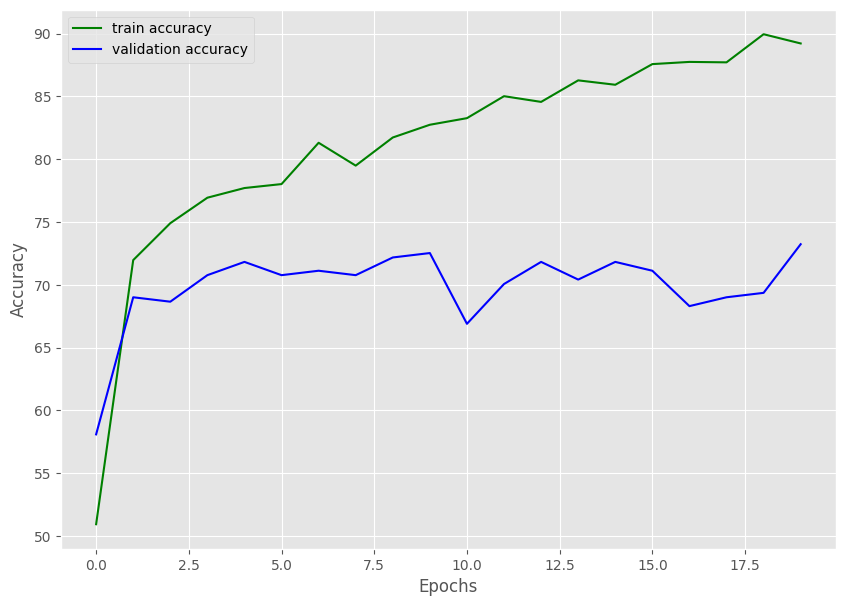

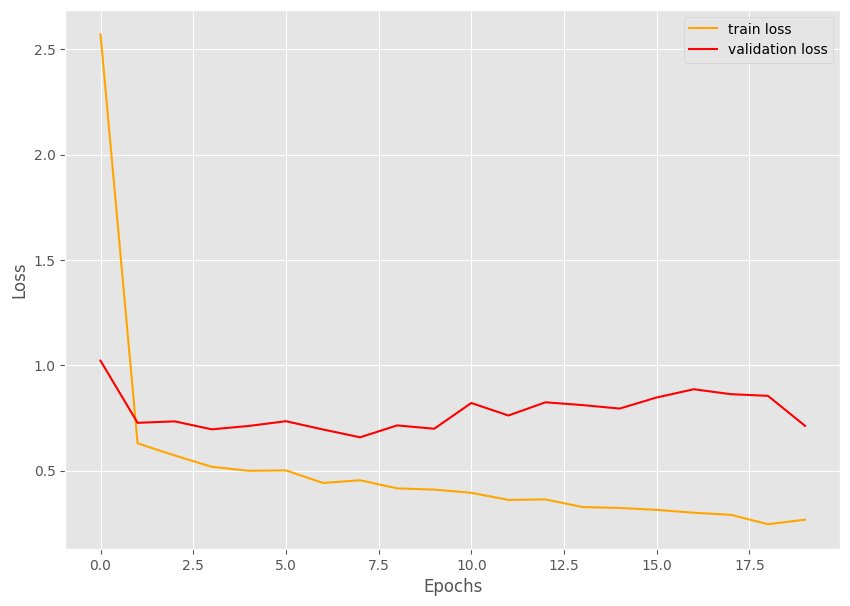

In [6]:
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, class_datasets.train_loader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, class_datasets.valid_loader,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)

    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)
    
# save the trained model weights
class_utils.save_model(epochs, model, optimizer, criterion)
# save the loss and accuracy plots
class_utils.save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')